<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

# 3.1 Hello World

In [27]:
# 3.1 Hello World 프로그램
print("Hello, World!")

Hello, World!


In [28]:
# 3.2 Hello World 프로그램 첫 줄의 # 를 지웠을 때 에러가 나는 모습
#3.1 Hello World
print("Hello, World!")

Hello, World!


In [29]:
# 3.3 Hello World 프로그램 문자열의 따옴표(“)를 홑따옴표(‘)로 바꿈
print('Hello, World!')

Hello, World!


# 3.2 Hello 텐서플로 2.0

In [30]:
# 3.4 텐서플로 2.0 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

In [31]:
# Google Colab 운영체제 확인
import platform
print(platform.platform())

Windows-10-10.0.19045-SP0


In [32]:
# 3.5 텐서플로우 불러오기, 버전 확인
import tensorflow as tf
print(tf.__version__)

2.12.0


In [33]:
# 3.6 텐서플로우 불러오기, 버전 확인 에러
import tensorflow as tf
print(tf.__version__)

2.12.0


# 3.3 텐서플로 기초

## 3.3.1 랜덤한 수 생성

In [34]:
# 3.7 랜덤한 수 얻기 (균일 분포)
rand = tf.random.uniform([1],0,1)
print(rand)

tf.Tensor([0.49725723], shape=(1,), dtype=float32)


In [35]:
# 3.8 랜덤한 수 여러 개 얻기 (균일 분포)
rand = tf.random.uniform([4],0,1)
print(rand)

tf.Tensor([0.4854412  0.17580688 0.6229967  0.03308487], shape=(4,), dtype=float32)


In [36]:
# 3.9 랜덤한 수 여러 개 얻기 (정규 분포)
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([-0.15082654  0.19573586  1.6655949  -0.70915246], shape=(4,), dtype=float32)


## 3.3.2 뉴런 만들기

In [37]:
# 3.10 sigmoid 함수
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [38]:
# 3.11 뉴런의 입력과 출력 정의
x = 1 # 입력
y = 0 # 출력
w = tf.random.normal([1],0,1)
output = sigmoid(x * w) # sigmoid 계산신 = 뉴런 / output : 기댓값, 예측값
print(output)

0.5014367980216922


In [39]:
# 3.12 경사 하강법을 이용한 뉴런의 학습
# for loop를 돌면서 error가 최소가 되는 지점을 찾아가는 것. 
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output # error : 잔차를 의미
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 -0.10209957163192562 0.10209957163192562
199 -0.05234036173004129 0.05234036173004129
299 -0.03484218938225656 0.03484218938225656
399 -0.026031611710260853 0.026031611710260853
499 -0.020749473374371635 0.020749473374371635
599 -0.017237138465343835 0.017237138465343835
699 -0.0147356113124817 0.0147356113124817
799 -0.012864716584109303 0.012864716584109303
899 -0.011413318119425121 0.011413318119425121
999 -0.010254915910580753 0.010254915910580753


In [40]:
# 3.13 x=0 일 때 y=1 을 얻는 뉴런의 학습
x = 0
y = 1
w = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5


899 0.5 0.5
999 0.5 0.5


In [41]:
# 3.14 x=0 일 때 y=1 을 얻는 뉴런의 학습에 편향을 더함
x = 0
y = 1
w = tf.random.normal([1],0,1) # 가중치 (난수)
b = tf.random.normal([1],0,1) # 편향 (난수)

for i in range(1000):
    output = sigmoid(x * w + 1 * b)
    error = y - output
    w = w + x * 0.1 * error
    b = b + 1 * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output) # error는 0으로 수렴하고, output은 1로 수렴함

99 0.10401458267764208 0.8959854173223579


199 0.0528662255120087 0.9471337744879913
299 0.03507859594266416 0.9649214040573358
399 0.026164498369969813 0.9738355016300302
499 0.020834254934515406 0.9791657450654846
599 0.017295807236044514 0.9827041927639555
699 0.014778567450025593 0.9852214325499744
799 0.012897505671697673 0.9871024943283023
899 0.011439144920751931 0.9885608550792481
999 0.010275786668844766 0.9897242133311552


## 3.3.3 첫번째 신경망 네트워크 : AND

In [42]:
# 3.15 True, False 의 정수값 확인
print(int(True))
print(int(False))

1
0


In [43]:
# 3.16 첫번째 신경망 네트워크 : AND
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]]) # 입력
y = np.array([[1], [0], [0], [0]]) # 출력
w = tf.random.normal([2],0,1) # 가중치
b = tf.random.normal([1],0,1) # 편향
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum) # error_sum은 0으로 수렴

199 -0.11747834676272405
399 -0.0681566037748477
599 -0.04791735898002111
799 -0.0368357489942631
999 -0.02985930523009349
1199 -0.025074661809636217
1399 -0.021594717617473717
1599 -0.01895329633538842
1799 -0.016879520816697618
1999 -0.015211544978530677


In [44]:
# 3.17 파이썬에서 리스트에 정수를 곱하기
print([1,2,3]*2)
print([1,2,3]*0)
print([1,2,3]*-1)

[1, 2, 3, 1, 2, 3]
[]
[]


In [45]:
# 3.18 파이썬에서 리스트에 실수를 곱하기
# print([1,2,3]*0.01)


my_list = [1, 2, 3]
multiplied_list = [x * 0.01 for x in my_list]
print(multiplied_list)


[0.01, 0.02, 0.03]


In [46]:
# 3.19 넘파이 array 에 정수, 실수를 곱하기
import numpy as np
print(np.array([1,2,3])*2)
print(np.array([1,2,3])*0)
print(np.array([1,2,3])*-1)
print(np.array([1,2,3])*0.01)

[2 4 6]
[0 0 0]
[-1 -2 -3]
[0.01 0.02 0.03]


In [47]:
# 3.20 AND 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9644873989621552
X: [1 0] Y: [0] Output: 0.025163408859339854
X: [0 1] Y: [0] Output: 0.02524113460209794
X: [0 0] Y: [0] Output: 2.4610722282364255e-05


## 3.3.4 두번째 신경망 네트워크 : OR

In [48]:
# 3.21 두번째 신경망 네트워크 : OR
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.051427118145668194
399 -0.026398593385470986
599 -0.017637401338263595
799 -0.01319445848009032
999 -0.010519460525675657
1199 -0.008737058677395285
1399 -0.007466367459283668
1599 -0.006515279833538105
1799 -0.005777676719883284
1999 -0.005187918933042376


In [49]:
# 3.22 OR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9999971423625018
X: [1 0] Y: [1] Output: 0.9897078964152234
X: [0 1] Y: [1] Output: 0.9896979539424733
X: [0 0] Y: [0] Output: 0.025720152970830093


## 3.3.5 세번째 신경망 네트워크 : XOR

In [50]:
# 3.23 세번째 신경망 네트워크 : XOR
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 0.003104822416801656
399 0.0001262008138895876
599 5.1375271176157256e-06
799 2.2243982722436328e-07
999 2.7921316370083105e-09
1199 1.8614210173240053e-09
1399 1.8614210173240053e-09
1599 1.8614210173240053e-09
1799 1.8614210173240053e-09
1999 1.8614210173240053e-09


In [51]:
# 3.24 XOR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Output: 0.5128176323940516
X: [1 0] Y: [1] Output: 0.5128176314633411
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.49999999813735485


In [52]:
# 3.25 XOR 네트워크의 w, b 값 확인
print('w:', w)
print('b:', b)

w: tf.Tensor([5.1281769e-02 3.7252903e-09], shape=(2,), dtype=float32)
b: tf.Tensor([-7.450581e-09], shape=(1,), dtype=float32)


In [53]:
# 3.26 AND 네트워크의 w, b 값 확인
# w: tf.Tensor([6.9484286 6.951607 ], shape=(2,), dtype=float32)
# b: tf.Tensor([-10.601849], shape=(1,), dtype=float32)

In [54]:
# 3.27 tf.keras 를 이용한 XOR 네트워크 계산
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [55]:
# 3.28 tf.keras 를 이용한 XOR 네트워크 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

Epoch 1/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2528
Epoch 2/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2528
Epoch 3/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2528
Epoch 4/2000
4/4 [==============================] - 0s 994us/step - loss: 0.2528
Epoch 5/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2528
Epoch 6/2000
4/4 [==============================] - 0s 997us/step - loss: 0.2528
Epoch 7/2000
4/4 [==============================] - 0s 997us/step - loss: 0.2528
Epoch 8/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2528
Epoch 9/2000
4/4 [==============================] - 0s 994us/step - loss: 0.2528
Epoch 10/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2528
Epoch 11/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2528
Epoch 12/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2528
Epoch 13/2000
4/4 [======================

In [56]:
# 3.29 tf.keras 를 이용한 XOR 네트워크 평가
model.predict(x)

1/1 [==============================] - 0s 111ms/step


array([[0.50470114],
       [0.4976191 ],
       [0.49979642],
       [0.48901764]], dtype=float32)

In [57]:
# 3.30 XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
    print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.0703006 ,  0.34247062],
       [-1.0956688 , -0.4995287 ]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([0.00823978, 0.00320632], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.15368071],
       [-0.03846974]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.05248613], dtype=float32)>


# 3.4 시각화 기초

## 3.4.1	matplotlib.pyplot 을 사용한 그래프 그리기

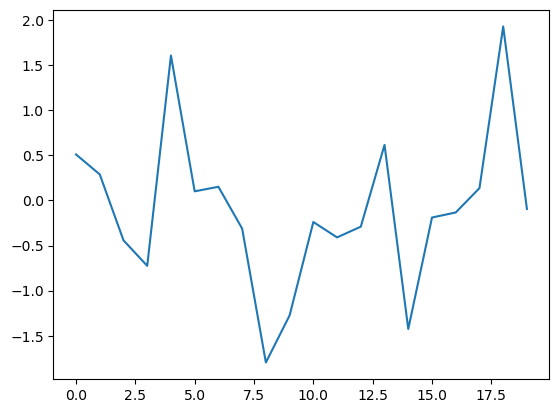

In [58]:
# 3.31 간단한 꺾은선 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y)
plt.show()

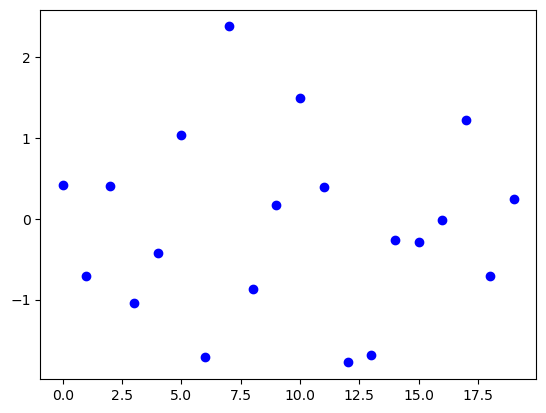

In [59]:
# 3.32 간단한 점 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y,'bo')
plt.show()

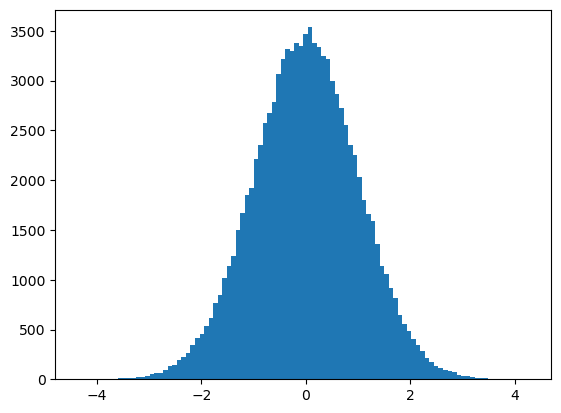

In [60]:
# 3.33 정규분포 그래프를 히스토그램으로 나타내기
import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000],0,1)
plt.hist(random_normal, bins=100)
plt.show()

## 3.4.2 2-레이어 XOR 네트워크의 정보 시각화

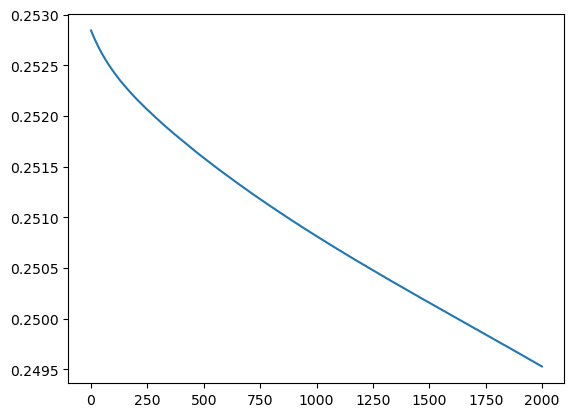

In [61]:
# 3.34 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])